In [5]:
import cv2
from tensordoc.layout_detector import LayoutDetectorFactory, LayoutDetectorType
from tensordoc.utils.visualize import visualize_image
from tensordoc.components.layout import Layout
from layoutparser import draw_box, draw_text


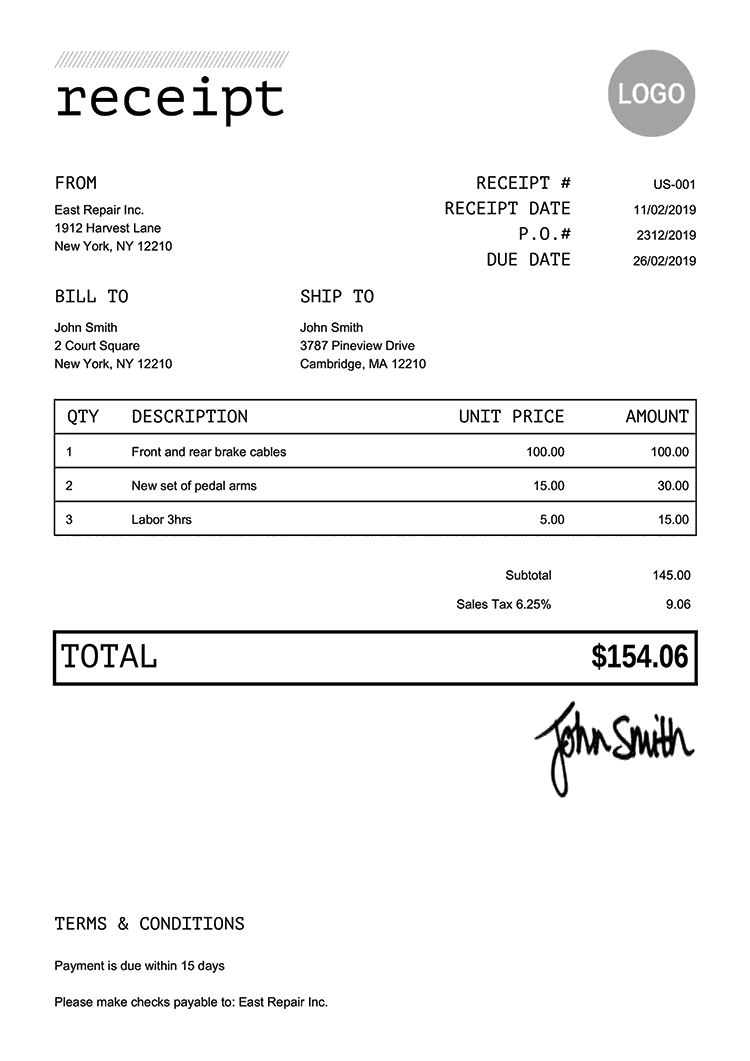

In [6]:
# Load the image
image = cv2.imread("./data/sample.png")
visualize_image(image)

In [7]:
cfg = {"detection_threshold":0.3}

detector = LayoutDetectorFactory.get_layout_detector(LayoutDetectorType.FASTER_RCNN, **cfg)
layout = detector.process(image)

/opt/homebrew/Caskroom/miniforge/base/envs/tensordoc/lib/python3.12/site-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch

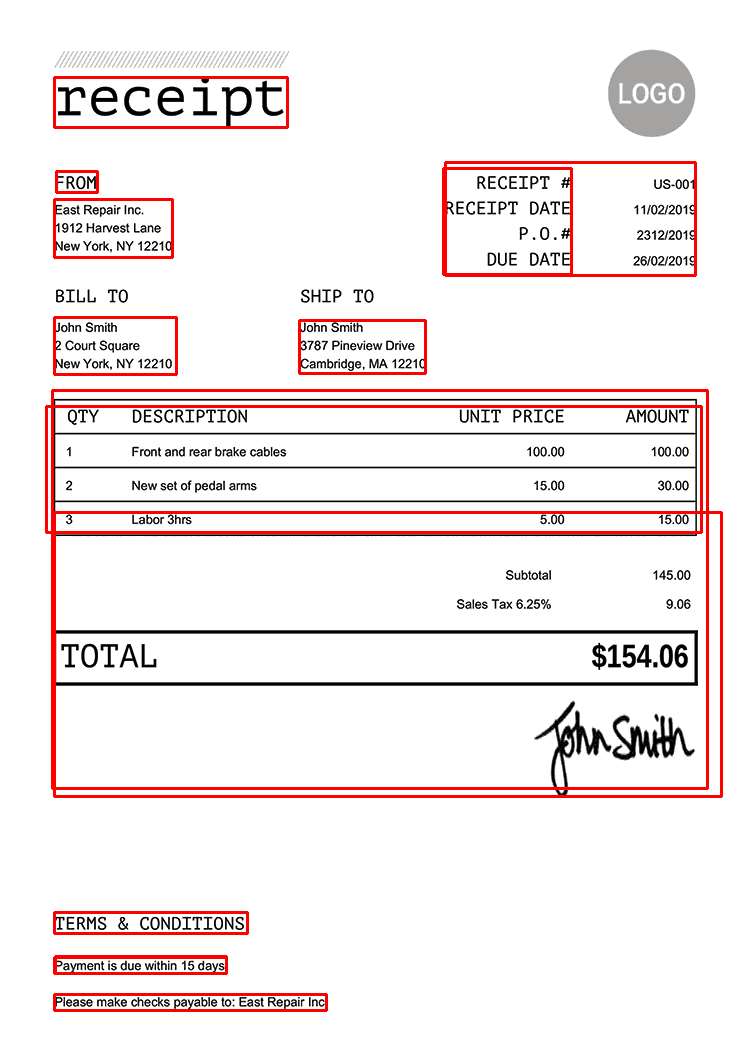

In [8]:
draw_box(image, layout, box_width=3)

In [10]:
def get_components(layout, component_types):
    blocks = Layout([l for l in layout if l.type in component_types])
    return blocks

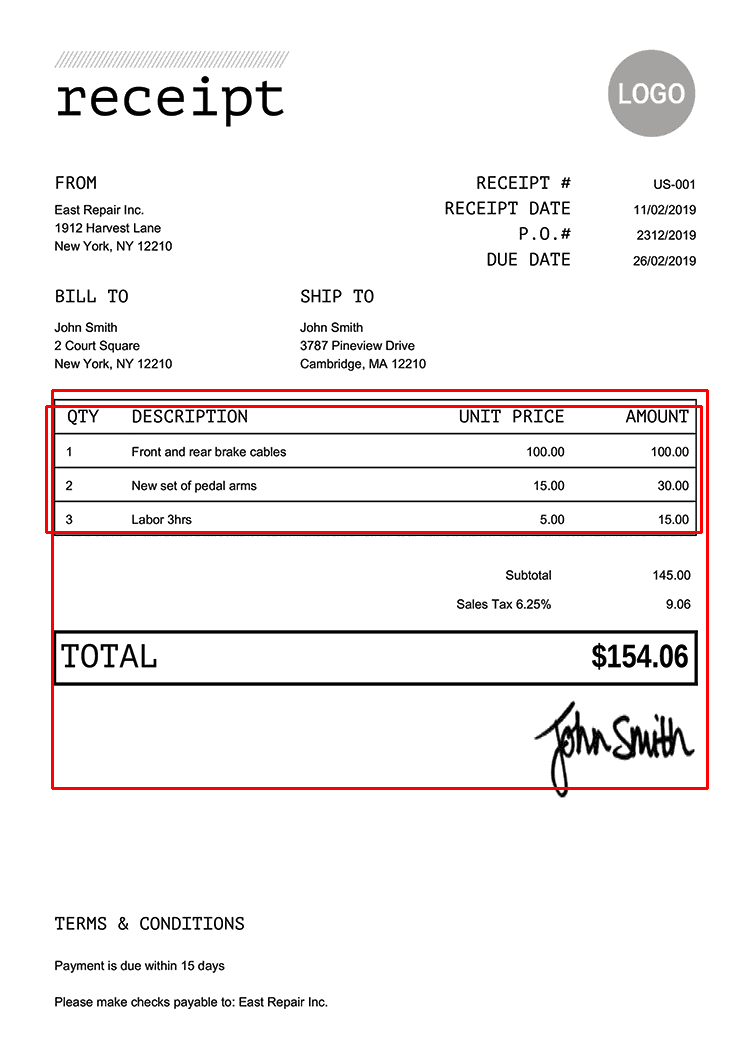

In [11]:
tables = get_components(layout, "Table")
draw_box(image, tables, box_width=3)

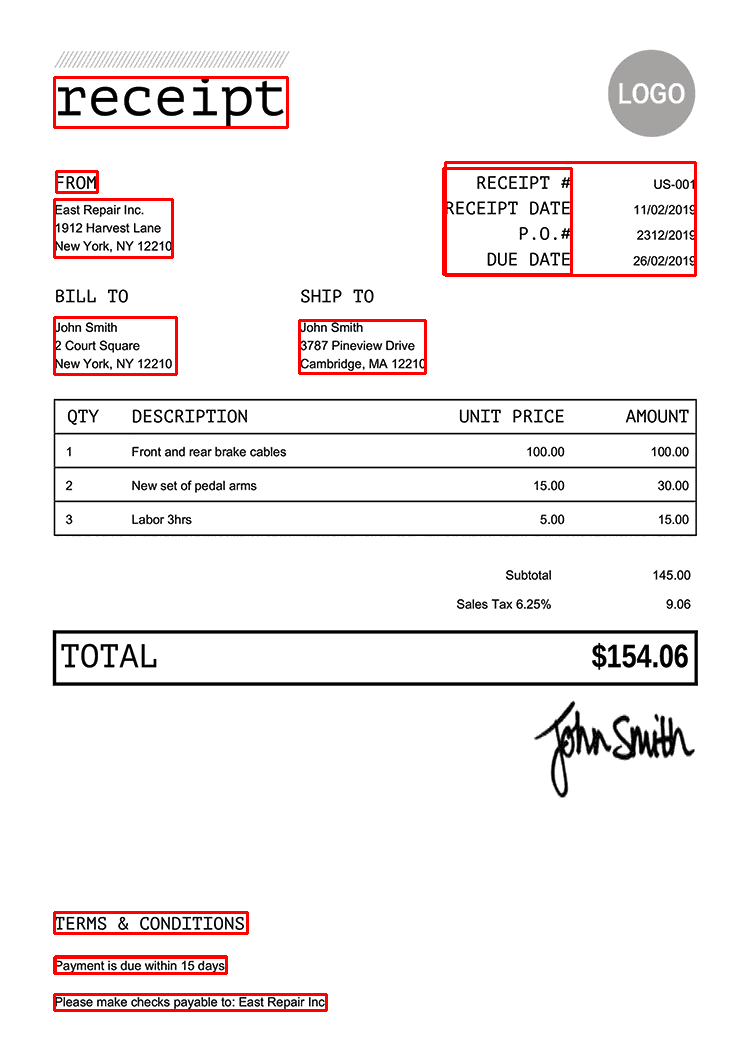

In [12]:
texts = get_components(layout, ["Text", "Title"])
draw_box(image, texts, box_width=3)